## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0805 00:01:07.885583 13332 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0805 00:01:07.887576 13332 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 00:01:08.014479 13332 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 00:01:08.015478 13332 deprecation_wrapper.py:119] From C:\Python\V3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 00:01:08.023457 13332 deprecation_wrapper.py:119] From C:\Python\V3\li

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0805 00:01:08.235421 13332 deprecation.py:323] From C:\Python\V3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.2670 - acc: 0.1512 - val_loss: 2.3077 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3098 - acc: 0.0990 - val_loss: 2.3047 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.3044 - acc: 0.0993 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.3042 - acc: 0.0995 - val_loss: 2.3060 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.3045 - acc: 0.1003 - val_loss: 2.3038 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.3043 - acc: 0.0987 - val_loss: 2.3047 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.3041 - acc: 0.1003 - val_loss: 2.3041 - 

Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5923 - acc: 0.4353 - val_loss: 1.5614 - val_acc: 0.4483
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5094 - acc: 0.4651 - val_loss: 1.4989 - val_acc: 0.4643
Epoch 4/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.4452 - acc: 0.4876 - val_loss: 1.4625 - val_acc: 0.4814
Epoch 5/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.3925 - acc: 0.5066 - val_loss: 1.4262 - val_acc: 0.4933
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.3580 - acc: 0.5182 - val_loss: 1.4866 - val_acc: 0.4693
Epoch 7/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3191 - acc: 0.5307 - val_loss: 1.4541 - val_acc: 0.4917
Epoch 8/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.2894 - acc: 0.5430 - val_loss: 1.3930 - val_acc: 0.5063
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 157us/step - loss: 1.7317 - acc: 0.3954 - val_loss: 1.6995 - val_acc: 0.4086
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6751 - acc: 0.4155 - val_loss: 1.6489 - val_acc: 0.4236
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6270 - acc: 0.4319 - val_loss: 1.6051 - val_acc: 0.4352
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5855 - acc: 0.4449 - val_loss: 1.5698 - val_acc: 0.4496
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5528 - acc: 0.4558 - val_loss: 1.5434 - val_acc: 0.4561
Epoch 8/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.5215 - acc: 0.4687 - val_loss: 1.5240 - val_acc: 0.4623
Epoch 9/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.4933 - acc: 0.4784 - val_loss: 1.5056 - val_acc: 0.4667
Epoch 10/50
50000/50000 [===================

50000/50000 [==============================] - 8s 160us/step - loss: 1.9641 - acc: 0.3077 - val_loss: 1.9428 - val_acc: 0.3169
Epoch 5/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.9258 - acc: 0.3202 - val_loss: 1.9099 - val_acc: 0.3304
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8959 - acc: 0.3327 - val_loss: 1.8842 - val_acc: 0.3396
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.8729 - acc: 0.3426 - val_loss: 1.8641 - val_acc: 0.3472
Epoch 8/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.8523 - acc: 0.3503 - val_loss: 1.8460 - val_acc: 0.3579
Epoch 9/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8353 - acc: 0.3579 - val_loss: 1.8307 - val_acc: 0.3581
Epoch 10/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.8203 - acc: 0.3625 - val_loss: 1.8158 - val_acc: 0.3633
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 8s 159us/step - loss: 2.2250 - acc: 0.1993 - val_loss: 2.2160 - val_acc: 0.2135
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.2104 - acc: 0.2141 - val_loss: 2.2020 - val_acc: 0.2223
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.1971 - acc: 0.2245 - val_loss: 2.1892 - val_acc: 0.2325
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.1846 - acc: 0.2320 - val_loss: 2.1771 - val_acc: 0.2396
Epoch 9/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.1729 - acc: 0.2398 - val_loss: 2.1656 - val_acc: 0.2446
Epoch 10/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.1615 - acc: 0.2456 - val_loss: 2.1545 - val_acc: 0.2500
Epoch 11/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.1506 - acc: 0.2519 - val_loss: 2.1438 - val_acc: 0.2554
Epoch 12/50
50000/50000 [==================

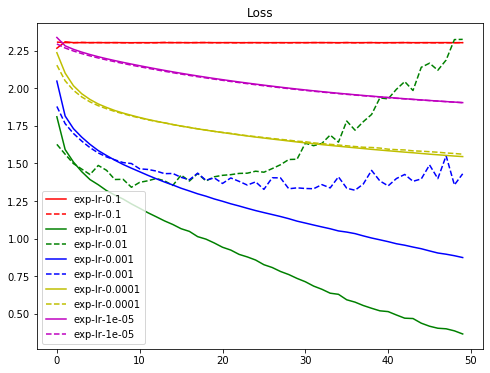

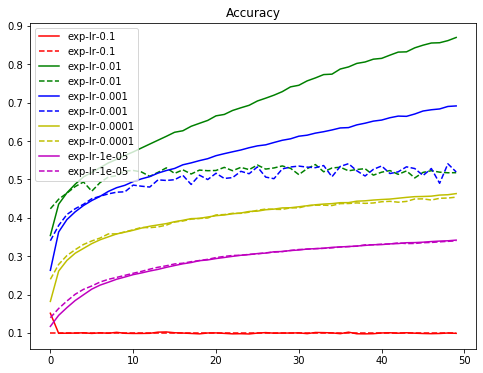

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.8798 - acc: 0.3208 - val_loss: 1.7032 - val_acc: 0.3843
Epoch 2/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6647 - acc: 0.4028 - val_loss: 1.5980 - val_acc: 0.4319
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5787 - acc: 0.4347 - val_loss: 1.5761 - val_acc: 0.4298
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5308 - acc: 0.4521 - val_loss: 1.5354 - val_acc: 0.4516
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4943 - acc: 0.4639 - val_loss: 1.4781 - val_acc: 0.4765
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.4394 - acc: 0.4864 - val_loss: 1.4705 - val_acc: 0.4816
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4173 - acc: 0.4928 - val_loss: 1.4486 - 

Epoch 2/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8136 - acc: 0.3607 - val_loss: 1.7592 - val_acc: 0.3798
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7352 - acc: 0.3856 - val_loss: 1.7088 - val_acc: 0.4017
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6740 - acc: 0.4105 - val_loss: 1.6484 - val_acc: 0.4219
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6239 - acc: 0.4271 - val_loss: 1.6147 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5873 - acc: 0.4406 - val_loss: 1.5781 - val_acc: 0.4441
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5588 - acc: 0.4519 - val_loss: 1.5535 - val_acc: 0.4507
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5330 - acc: 0.4611 - val_loss: 1.5483 - val_acc: 0.4516
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 144us/step - loss: 2.0545 - acc: 0.2873 - val_loss: 2.0238 - val_acc: 0.3049
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.9967 - acc: 0.3086 - val_loss: 1.9740 - val_acc: 0.3127
Epoch 5/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.9547 - acc: 0.3210 - val_loss: 1.9375 - val_acc: 0.3263
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.9232 - acc: 0.3296 - val_loss: 1.9128 - val_acc: 0.3372
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8984 - acc: 0.3393 - val_loss: 1.8888 - val_acc: 0.3412
Epoch 8/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8771 - acc: 0.3461 - val_loss: 1.8694 - val_acc: 0.3521
Epoch 9/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8593 - acc: 0.3529 - val_loss: 1.8540 - val_acc: 0.3516
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 148us/step - loss: 2.2300 - acc: 0.2069 - val_loss: 2.2257 - val_acc: 0.2093
Epoch 5/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.2141 - acc: 0.2144 - val_loss: 2.2107 - val_acc: 0.2183
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.1994 - acc: 0.2226 - val_loss: 2.1968 - val_acc: 0.2232
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.1856 - acc: 0.2291 - val_loss: 2.1837 - val_acc: 0.2294
Epoch 8/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.1727 - acc: 0.2349 - val_loss: 2.1713 - val_acc: 0.2309
Epoch 9/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.1605 - acc: 0.2390 - val_loss: 2.1597 - val_acc: 0.2364
Epoch 10/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.1490 - acc: 0.2437 - val_loss: 2.1485 - val_acc: 0.2424
Epoch 11/50
50000/50000 [===================

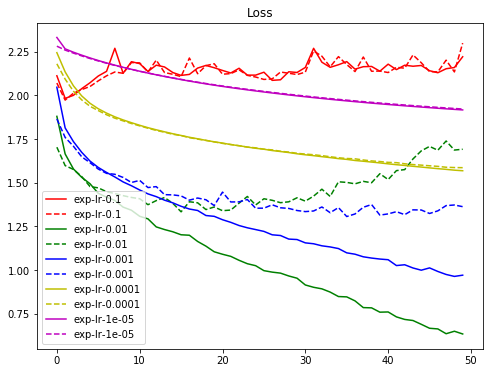

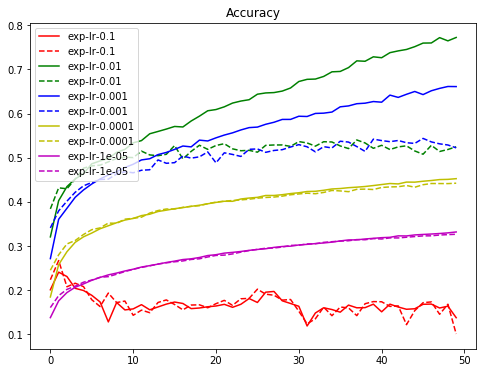

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()